In [12]:
# for i in range(168):
#     print(f"python gaussian\ process.py --fold_num 0 --dataset zhonghang --start {i} & ")

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import torch
# from pyod.models.iforest import IForest
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [33]:
dataset_name = 'brand1'
ind_car_num_list = [129, 158, 152, 79, 95
        , 114, 34, 177, 99, 138, 163, 54, 45, 115, 66, 87, 47, 57, 31, 195, 36, 102,
                        72, 173, 94, 51, 92, 61, 153, 125, 103, 3, 50, 10, 7, 146, 166, 48, 75, 86, 15, 175, 64, 2, 110, 13,
                        23, 93, 116, 62, 8, 41, 22, 6, 24, 101, 46, 187, 198, 142, 131, 18, 160, 56, 29, 141, 148, 168, 71,
                        53, 104, 120, 154, 20, 17, 111, 133, 63, 35, 83, 5, 88, 159, 145, 176, 127, 77, 118, 52, 81, 121,
                        59, 38, 80, 109, 179, 28, 123, 44, 180, 149, 135, 164, 74, 40, 14, 65, 69, 42, 193, 12, 60, 73, 126,
                        161, 188, 32, 30, 170, 128, 167, 9, 155, 156, 43, 100, 33, 90, 139, 1, 112, 25, 4, 16, 189, 147,
                        124, 178, 55, 85, 122, 96, 162, 132, 89, 19, 27, 84, 39, 151, 67, 26, 172, 76, 37, 143, 58, 165, 97,
                        134, 82, 113, 137, 144, 70, 11, 117, 106]  # 169
ood_car_num_list = [91, 192, 169, 130, 140
    , 171, 190, 186, 105, 49, 181, 157, 183, 185, 194, 98, 191, 136, 119, 196, 107, 68, 108, 78, 182, 150, 174, 21, 184, 197]


# dataset_name = 'brand2'
# ind_car_num_list = [214, 231, 233, 234, 218, 201, 211, 248, 222, 203, 223, 246, 229, 249, 227, 207, 232, 250, 208, 245,
#                         213, 228, 220, 244, 217, 238, 221, 224, 226, 216, 202, 242, 235]  # 33
# ood_car_num_list = [205, 247, 241, 204, 206, 210, 243, 240, 219, 225, 209, 237, 236, 212, 215, 239]


# dataset_name = 'brand3'
# ind_car_num_list = [411, 410, 434, 449, 423, 414, 431, 485, 446, 466, 453, 480, 455, 488, 402, 439, 427, 409, 442,
#                         448, 428, 452, 429, 484, 482, 457, 459, 499, 413, 461, 403, 470, 481, 493, 417, 496, 407, 495,
#                         418, 426, 436, 491, 500, 474, 476, 487, 430, 451, 498, 401, 463, 494, 406, 420, 497, 433, 435,
#                         440, 416, 464, 445, 479, 425, 460, 490, 478, 467, 447, 412, 489, 444, 422, 477, 437, 415, 486,
#                         441, 421, 471, 432, 483, 450, 468, 443, 456, 469, 472, 438, 408, 458, 454]
# ood_car_num_list = [424, 419, 473, 462, 492, 465, 404, 405, 475]


#     dataframe_std3['car'] = (dataframe_std3['car'].astype("int")+200).astype("str")
#     dataframe_std4['car'] = (dataframe_std4['car'].astype("int")+200).astype("str")
#     dataframe_std5['car'] = (dataframe_std5['car'].astype("int")+300).astype("str")

# print(dataframe_std)


In [34]:
ind_car_num = len(ind_car_num_list)
ood_car_num = len(ood_car_num_list)
print(ind_car_num)
print(ood_car_num)

91
9


In [35]:
fold_num = 0

(27824,) (0,) (1774,) (1774,)
27824
1774
(27824,)
(1774,)
(27824, 3)
(1774, 3)
(29598, 3)


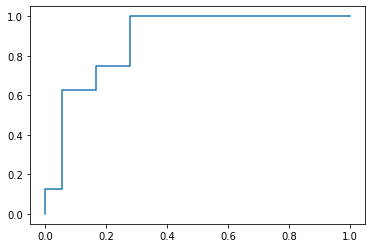

0.8819444444444444


In [36]:
AUC_list = []

y_train_scores = [np.load(f'gaussian_process/{dataset_name}/y_train_scores_fold0_start{_i}.npy') for _i in range(ind_car_num)]
y_train_scores = np.hstack(y_train_scores)
y_test_pred = [np.load(f'gaussian_process/{dataset_name}/y_test_pred_fold0_start{_i}.npy') for _i in range(ood_car_num)]
y_test_pred = np.hstack(y_test_pred)
y_test_scores = [np.load(f'gaussian_process/{dataset_name}/y_test_scores_fold0_start{_i}.npy') for _i in range(ood_car_num)]
y_test_scores = np.hstack(y_test_scores)
y_test = [np.load(f'gaussian_process/{dataset_name}/y_test_fold0_start{_i}.npy').reshape(-1) for _i in range(ood_car_num)]
y_test = np.hstack(y_test)

print(y_train_scores.shape, y_test_pred.shape, y_test_scores.shape, y_test.shape)

# ind_car_num_list = [411, 410, 434, 449, 423, 414, 431, 485, 446, 466, 453, 480, 455, 488, 402, 439, 427, 409, 442, 448, 428, 452, 429, 484, 482, 457, 459, 499, 413, 461, 403, 470, 481, 493, 417, 496, 407, 495, 418, 426, 436, 491, 500, 474, 476, 487, 430, 451, 498, 401, 463, 494, 406, 420, 497, 433, 435, 440, 416, 464, 445, 479, 425, 460, 490, 478, 467, 447, 412, 489, 444, 422, 477, 437, 415, 486, 441, 421, 471, 432, 483, 450, 468, 443, 456, 469, 472, 438, 408, 458, 454]
# ood_car_num_list = [424, 419, 473, 462, 492, 465, 404, 405, 475]


car_number_train = ind_car_num_list
car_number_test = ood_car_num_list

# build 3 column csv file
all_car_dict = np.load('../five_fold_utils/all_car_dict.npz.npy', allow_pickle=True).item()

car_train = []
for each_num in car_number_train:
    for each_pkl in all_car_dict[each_num]:
        car_train.append(each_num)
car_test = []
for each_num in car_number_test:
    for each_pkl in all_car_dict[each_num]:
        car_test.append(each_num)
print(len(car_train))
print(len(car_test))
car_train = np.array(car_train)
car_test = np.array(car_test)


print(y_train_scores.shape)
print(y_test_scores.shape)

car_label_train = []
car_label_test = []

for each in car_train:
    if each in ind_car_num_list:
        car_label_train.append(0)
    if each in ood_car_num_list:
        car_label_train.append(1)
for each in car_test:
    if each in ind_car_num_list:
        car_label_test.append(0)
    if each in ood_car_num_list:
        car_label_test.append(1)
car_label_train = np.array(car_label_train)
car_label_test = np.array(car_label_test)

data_train = np.vstack((car_label_train, car_train, y_train_scores)).T
data_test = np.vstack((car_label_test, car_test, y_test_scores)).T

data = np.vstack((data_train, data_test))

print(data_train.shape)
print(data_test.shape)
#     print(data_train[:5, ])
print(data.shape)

validation_car_number = ind_car_num_list[:int(fold_num * len(ind_car_num_list) / 5)] + ind_car_num_list[int((fold_num + 1) * len(ind_car_num_list) / 5):] + ood_car_num_list[int(fold_num * len(ood_car_num_list) / 5):int((fold_num + 1) * len(ood_car_num_list) / 5)]
test_car_number = ind_car_num_list[int(fold_num * len(ind_car_num_list) / 5):int((fold_num + 1) * len(ind_car_num_list) / 5)] + ood_car_num_list[:int(fold_num * len(ood_car_num_list) / 5)] + ood_car_num_list[int((fold_num + 1) * len(ood_car_num_list) / 5):]

ind_car_score = []
ood_car_score = []

for each_car_num in test_car_number:
    this_car_score = np.mean(data[np.where(data[:, 1]==each_car_num)][:, 2])
    if each_car_num in ind_car_num_list:
        ind_car_score.append(this_car_score)
    else:
        ood_car_score.append(this_car_score)
#     print(each_car_num, len(this_car_score))

label = [1] * len(ood_car_score) + [0] * len(ind_car_score)
score = np.hstack((ood_car_score, ind_car_score))

fpr, tpr, thresholds = metrics.roc_curve(label, score, pos_label=1)
plt.plot(fpr, tpr)
plt.show()
AUC = auc(fpr, tpr)
print(AUC)
AUC_list.append(AUC)


np.save(f'gaussian_process/{dataset_name}/gp_robust_no_score_fold%d.npy' % fold_num, score)
np.save(f'gaussian_process/{dataset_name}/gp_robust_no_label_fold%d.npy' % fold_num, label)


In [46]:
y_train_scores = []
y_test_pred = []
y_test_scores = []
y_test = []

ind_car_num_list = []
ood_car_num_list = []

dataset_name = 'brand1'
ind_car_num_list = [129, 158, 152, 79, 95
        , 114, 34, 177, 99, 138, 163, 54, 45, 115, 66, 87, 47, 57, 31, 195, 36, 102,
                        72, 173, 94, 51, 92, 61, 153, 125, 103, 3, 50, 10, 7, 146, 166, 48, 75, 86, 15, 175, 64, 2, 110, 13,
                        23, 93, 116, 62, 8, 41, 22, 6, 24, 101, 46, 187, 198, 142, 131, 18, 160, 56, 29, 141, 148, 168, 71,
                        53, 104, 120, 154, 20, 17, 111, 133, 63, 35, 83, 5, 88, 159, 145, 176, 127, 77, 118, 52, 81, 121,
                        59, 38, 80, 109, 179, 28, 123, 44, 180, 149, 135, 164, 74, 40, 14, 65, 69, 42, 193, 12, 60, 73, 126,
                        161, 188, 32, 30, 170, 128, 167, 9, 155, 156, 43, 100, 33, 90, 139, 1, 112, 25, 4, 16, 189, 147,
                        124, 178, 55, 85, 122, 96, 162, 132, 89, 19, 27, 84, 39, 151, 67, 26, 172, 76, 37, 143, 58, 165, 97,
                        134, 82, 113, 137, 144, 70, 11, 117, 106]  # 169
ood_car_num_list = [91, 192, 169, 130, 140
    , 171, 190, 186, 105, 49, 181, 157, 183, 185, 194, 98, 191, 136, 119, 196, 107, 68, 108, 78, 182, 150, 174, 21, 184, 197]

y_train_scores += [np.load(f'gaussian_process/{dataset_name}/y_train_scores_fold0_start{_i}.npy') for _i in range(len(ind_car_num_list))]
y_test_pred += [np.load(f'gaussian_process/{dataset_name}/y_test_pred_fold0_start{_i}.npy') for _i in range(len(ood_car_num_list))]
y_test_scores += [np.load(f'gaussian_process/{dataset_name}/y_test_scores_fold0_start{_i}.npy') for _i in range(len(ood_car_num_list))]
y_test += [np.load(f'gaussian_process/{dataset_name}/y_test_fold0_start{_i}.npy').reshape(-1) for _i in range(len(ood_car_num_list))]



dataset_name = 'brand2'
ind_car_num_list = [214, 231, 233, 234, 218, 201, 211, 248, 222, 203, 223, 246, 229, 249, 227, 207, 232, 250, 208, 245,
                        213, 228, 220, 244, 217, 238, 221, 224, 226, 216, 202, 242, 235]  # 33
ood_car_num_list = [205, 247, 241, 204, 206, 210, 243, 240, 219, 225, 209, 237, 236, 212, 215, 239]

y_train_scores += [np.load(f'gaussian_process/{dataset_name}/y_train_scores_fold0_start{_i}.npy') for _i in range(len(ind_car_num_list))]
y_test_pred += [np.load(f'gaussian_process/{dataset_name}/y_test_pred_fold0_start{_i}.npy') for _i in range(len(ood_car_num_list))]
y_test_scores += [np.load(f'gaussian_process/{dataset_name}/y_test_scores_fold0_start{_i}.npy') for _i in range(len(ood_car_num_list))]
y_test += [np.load(f'gaussian_process/{dataset_name}/y_test_fold0_start{_i}.npy').reshape(-1) for _i in range(len(ood_car_num_list))]



dataset_name = 'brand3'
ind_car_num_list = [411, 410, 434, 449, 423, 414, 431, 485, 446, 466, 453, 480, 455, 488, 402, 439, 427, 409, 442,
                        448, 428, 452, 429, 484, 482, 457, 459, 499, 413, 461, 403, 470, 481, 493, 417, 496, 407, 495,
                        418, 426, 436, 491, 500, 474, 476, 487, 430, 451, 498, 401, 463, 494, 406, 420, 497, 433, 435,
                        440, 416, 464, 445, 479, 425, 460, 490, 478, 467, 447, 412, 489, 444, 422, 477, 437, 415, 486,
                        441, 421, 471, 432, 483, 450, 468, 443, 456, 469, 472, 438, 408, 458, 454]
ood_car_num_list = [424, 419, 473, 462, 492, 465, 404, 405, 475]

y_train_scores += [np.load(f'gaussian_process/{dataset_name}/y_train_scores_fold0_start{_i}.npy') for _i in range(len(ind_car_num_list))]
y_test_pred += [np.load(f'gaussian_process/{dataset_name}/y_test_pred_fold0_start{_i}.npy') for _i in range(len(ood_car_num_list))]
y_test_scores += [np.load(f'gaussian_process/{dataset_name}/y_test_scores_fold0_start{_i}.npy') for _i in range(len(ood_car_num_list))]
y_test += [np.load(f'gaussian_process/{dataset_name}/y_test_fold0_start{_i}.npy').reshape(-1) for _i in range(len(ood_car_num_list))]

y_train_scores = np.hstack(y_train_scores)
y_test_pred = np.hstack(y_test_pred)
y_test_scores = np.hstack(y_test_scores)
y_test = np.hstack(y_test)

In [48]:
dataset_name = 'all'
ind_car_num_list = [129, 158, 152, 79, 95
        , 114, 34, 177, 99, 138, 163, 54, 45, 115, 66, 87, 47, 57, 31, 195, 36, 102,
                        72, 173, 94, 51, 92, 61, 153, 125, 103, 3, 50, 10, 7, 146, 166, 48, 75, 86, 15, 175, 64, 2, 110, 13,
                        23, 93, 116, 62, 8, 41, 22, 6, 24, 101, 46, 187, 198, 142, 131, 18, 160, 56, 29, 141, 148, 168, 71,
                        53, 104, 120, 154, 20, 17, 111, 133, 63, 35, 83, 5, 88, 159, 145, 176, 127, 77, 118, 52, 81, 121,
                        59, 38, 80, 109, 179, 28, 123, 44, 180, 149, 135, 164, 74, 40, 14, 65, 69, 42, 193, 12, 60, 73, 126,
                        161, 188, 32, 30, 170, 128, 167, 9, 155, 156, 43, 100, 33, 90, 139, 1, 112, 25, 4, 16, 189, 147,
                        124, 178, 55, 85, 122, 96, 162, 132, 89, 19, 27, 84, 39, 151, 67, 26, 172, 76, 37, 143, 58, 165, 97,
                        134, 82, 113, 137, 144, 70, 11, 117, 106] + [214, 231, 233, 234, 218, 201, 211, 248, 222, 203, 223, 246, 229, 249, 227, 207, 232, 250, 208, 245,
                        213, 228, 220, 244, 217, 238, 221, 224, 226, 216, 202, 242, 235] + [411, 410, 434, 449, 423, 414, 431, 485, 446, 466, 453, 480, 455, 488, 402, 439, 427, 409, 442,
                        448, 428, 452, 429, 484, 482, 457, 459, 499, 413, 461, 403, 470, 481, 493, 417, 496, 407, 495,
                        418, 426, 436, 491, 500, 474, 476, 487, 430, 451, 498, 401, 463, 494, 406, 420, 497, 433, 435,
                        440, 416, 464, 445, 479, 425, 460, 490, 478, 467, 447, 412, 489, 444, 422, 477, 437, 415, 486,
                        441, 421, 471, 432, 483, 450, 468, 443, 456, 469, 472, 438, 408, 458, 454]
ood_car_num_list = [91, 192, 169, 130, 140
    , 171, 190, 186, 105, 49, 181, 157, 183, 185, 194, 98, 191, 136, 119, 196, 107, 68, 108, 78, 182, 150, 174, 21, 184, 197] + [205, 247, 241, 204, 206, 210, 243, 240, 219, 225, 209, 237, 236, 212, 215, 239] +  [424, 419, 473, 462, 492, 465, 404, 405, 475]

(570490,) (0,) (130092,) (130092,)
570490
130092
(570490,)
(130092,)
(570490,) (570490,) (570490,)
(130092,) (130092,) (130092,)
(570490, 3)
(130092, 3)
(700582, 3)


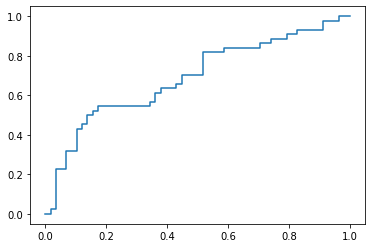

0.6896551724137931


In [50]:
print(y_train_scores.shape, y_test_pred.shape, y_test_scores.shape, y_test.shape)


car_number_train = ind_car_num_list
car_number_test = ood_car_num_list

# build 3 column csv file
all_car_dict = np.load('../five_fold_utils/all_car_dict.npz.npy', allow_pickle=True).item()

car_train = []
for each_num in car_number_train:
    for each_pkl in all_car_dict[each_num]:
        car_train.append(each_num)
car_test = []
for each_num in car_number_test:
    for each_pkl in all_car_dict[each_num]:
        car_test.append(each_num)
print(len(car_train))
print(len(car_test))
car_train = np.array(car_train)
car_test = np.array(car_test)


print(y_train_scores.shape)
print(y_test_scores.shape)

car_label_train = []
car_label_test = []

for each in car_train:
    if each in ind_car_num_list:
        car_label_train.append(0)
    if each in ood_car_num_list:
        car_label_train.append(1)
for each in car_test:
    if each in ind_car_num_list:
        car_label_test.append(0)
    if each in ood_car_num_list:
        car_label_test.append(1)
car_label_train = np.array(car_label_train)
car_label_test = np.array(car_label_test)

print(car_label_train.shape, car_train.shape, y_train_scores.shape)
print(car_label_test.shape, car_test.shape, y_test_scores.shape)
data_train = np.vstack((car_label_train, car_train, y_train_scores)).T
data_test = np.vstack((car_label_test, car_test, y_test_scores)).T

data = np.vstack((data_train, data_test))

print(data_train.shape)
print(data_test.shape)
#     print(data_train[:5, ])
print(data.shape)

validation_car_number = ind_car_num_list[:int(fold_num * len(ind_car_num_list) / 5)] + ind_car_num_list[int((fold_num + 1) * len(ind_car_num_list) / 5):] + ood_car_num_list[int(fold_num * len(ood_car_num_list) / 5):int((fold_num + 1) * len(ood_car_num_list) / 5)]
test_car_number = ind_car_num_list[int(fold_num * len(ind_car_num_list) / 5):int((fold_num + 1) * len(ind_car_num_list) / 5)] + ood_car_num_list[:int(fold_num * len(ood_car_num_list) / 5)] + ood_car_num_list[int((fold_num + 1) * len(ood_car_num_list) / 5):]

ind_car_score = []
ood_car_score = []

for each_car_num in test_car_number:
    this_car_score = np.mean(data[np.where(data[:, 1]==each_car_num)][:, 2])
    if each_car_num in ind_car_num_list:
        ind_car_score.append(this_car_score)
    else:
        ood_car_score.append(this_car_score)
#     print(each_car_num, len(this_car_score))

label = [1] * len(ood_car_score) + [0] * len(ind_car_score)
score = np.hstack((ood_car_score, ind_car_score))

fpr, tpr, thresholds = metrics.roc_curve(label, score, pos_label=1)
plt.plot(fpr, tpr)
plt.show()
AUC = auc(fpr, tpr)
print(AUC)
AUC_list.append(AUC)


np.save(f'gaussian_process/{dataset_name}/gp_robust_no_score_fold%d.npy' % fold_num, score)
np.save(f'gaussian_process/{dataset_name}/gp_robust_no_label_fold%d.npy' % fold_num, label)


In [52]:
os.makedirs(f"gaussian_process/{dataset_name}")
np.save(f'gaussian_process/{dataset_name}/gp_robust_no_score_fold%d.npy' % fold_num, score)
np.save(f'gaussian_process/{dataset_name}/gp_robust_no_label_fold%d.npy' % fold_num, label)
